# Table of content

1. [Exploring the dataset](#exploring-the-dataset)
2. [Data Engineering](#Data-Engineering)
    - [Handling Pic Data](#handing-pic-data)
    - [Number of Interaction Within 3 Days](#number-of-interaction-within-3-days)
    - [Number of Interaction Within 7 Days](#number-of-interaction-within-7-days)
    - [Merge Data](#merge-data)
3. [Exploratory Data Analysis and Processing](#exploratory-data-analysis-and-processing)
4. [Feature Engineering](#feature-engineering)
    - [Remove Outliers](#removing-outliers)
    - [One-Hot Encoding](#one-hot-encoding) 
    - [MinMaxScaler](#minmaxscaler)
5. [Classical Machine Learning](#classical-machine-learning)
    - [Predicting Interactions Within 3 Days](#predicting-interactions-within-3-days)
    - [Predicting Interactions Within 7 Days](#predicting-interactions-within-7-days)
    

    


## Exploring the dataset:

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
# View options for pandas
pd.set_option('max_columns', 50)
pd.set_option('max_rows', 10)

In [53]:
# Read all data

# Properties data
data = pd.read_csv('datasets/property_data_set.csv',parse_dates = ['activation_date'], 
                   infer_datetime_format = True, dayfirst=True)

# Data containing the timestamps of interaction on the properties
interaction = pd.read_csv('datasets/property_interactions.csv',
                          parse_dates = ['request_date'] , infer_datetime_format = True, dayfirst=True)

# Data containing photo counts of properties
pics = pd.read_table('datasets/property_photos.tsv')

In [54]:
# Print shape (num. of rows, num. of columns) of all data 
print('Property data Shape', data.shape)
print('Pics data Shape',pics.shape)
print('Interaction data Shape',interaction.shape)

Property data Shape (28888, 21)
Pics data Shape (28888, 2)
Interaction data Shape (170611, 2)


In [55]:
print("First 5 rows of the interactions data:")
interaction.head(5)

First 5 rows of the interactions data:


,property_id,request_date
0,ff808081469fd6e20146a5af948000ea,2017-03-10 17:42:34
1,ff808081469fd6e20146a5af948000ea,2017-03-09 15:51:17
2,ff808081469fd6e20146a5af948000ea,2017-03-10 17:30:22
3,ff808081469fd6e20146a5af948000ea,2017-03-11 17:48:46
4,ff8080814702d3d10147068359d200cd,2017-03-30 19:59:15


In [56]:
print("First 5 rows of the data containing photos count:")
pics.head(5)

First 5 rows of the data containing photos count:


,property_id,photo_urls
0,ff808081469fd6e20146a5af948000ea,"[{\title\"":\""Balcony\"",\""name\"":\""IMG_20131006..."
1,ff8080814702d3d10147068359d200cd,NaN
2,ff808081470c645401470fb03f5800a6,"[{\title\"":\""Bedroom\"",\""name\"":\""ff808081470c..."
3,ff808081470c6454014715eaa5960281,"[{\title\"":\""Bedroom\"",\""name\"":\""Screenshot_7..."
4,ff808081474aa867014771a0298f0aa6,"[{\title\"":\""Other\"",\""name\"":\""ff808081474aa8..."


In [57]:
print("First 5 rows of the properties data:")
data.head(5)

First 5 rows of the properties data:


,property_id,type,activation_date,bathroom,floor,total_floor,furnishing,gym,latitude,longitude,lease_type,lift,locality,parking,property_age,property_size,swimming_pool,pin_code,rent,deposit,building_type
0,ff808081469fd6e20146a5af948000ea,BHK2,2017-03-09 14:36:00,1,3,4.0,SEMI_FURNISHED,1,12.876174,77.596571,FAMILY,1,Hulimavu,BOTH,2,850,1,560076.0,12000,120000,AP
1,ff8080814702d3d10147068359d200cd,BHK2,2017-03-07 12:02:00,2,4,11.0,SEMI_FURNISHED,1,13.018444,77.678122,FAMILY,1,Ramamurthy Nagar,BOTH,1,1233,1,560016.0,20000,150000,AP
2,ff808081470c645401470fb03f5800a6,BHK2,2017-03-10 13:43:00,2,0,4.0,NOT_FURNISHED,1,12.975072,77.665865,ANYONE,1,GM Palya,FOUR_WHEELER,0,1200,0,560075.0,15000,75000,AP
3,ff808081470c6454014715eaa5960281,BHK3,2017-03-09 22:16:00,2,3,4.0,SEMI_FURNISHED,0,12.888169,77.591282,ANYONE,0,Arakere,BOTH,1,1300,0,560076.0,17000,150000,AP
4,ff808081474aa867014771a0298f0aa6,BHK1,2017-03-15 18:29:00,1,1,2.0,SEMI_FURNISHED,0,12.990243,77.712962,ANYONE,0,Hoodi,BOTH,4,450,0,560048.0,6500,40000,IF


In [58]:
print("Summary Stats:")
data.describe()

Summary Stats:


,bathroom,floor,total_floor,gym,latitude,longitude,lift,property_age,property_size,swimming_pool,pin_code,rent,deposit
count,28888.000000,28888.000000,28845.000000,28888.000000,28888.000000,28888.000000,28888.000000,28888.000000,28888.000000,28888.000000,2.856300e+04,28888.000000,2.888800e+04
mean,1.795867,1.786659,3.518807,0.165951,12.957859,77.605186,0.279009,4.380539,966.338999,0.142585,5.615600e+05,14430.768797,1.233257e+05
std,0.778676,2.361768,3.362536,0.372043,0.219500,0.921003,0.448520,7.458914,619.390016,0.349655,8.979452e+04,9055.133718,1.255028e+05
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1000.000000,0.000000e+00
25%,1.000000,0.000000,2.000000,0.000000,12.906324,77.563295,0.000000,0.000000,600.000000,0.000000,5.600400e+05,8000.000000,5.000000e+04
50%,2.000000,1.000000,3.000000,0.000000,12.953939,77.614568,0.000000,3.000000,900.000000,0.000000,5.600670e+05,12500.000000,1.000000e+05
75%,2.000000,2.000000,4.000000,0.000000,13.009369,77.669235,1.000000,6.000000,1200.000000,0.000000,5.600840e+05,18000.000000,1.500000e+05
max,22.000000,123.000000,38.000000,1.000000,21.176277,80.256293,1.000000,800.000000,40000.000000,1.000000,5.601000e+06,75000.000000,4.200000e+06


In [59]:
print("Information of the dataset:")
data.info()

Information of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28888 entries, 0 to 28887
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   property_id      28888 non-null  object        
 1   type             28888 non-null  object        
 2   activation_date  28888 non-null  datetime64[ns]
 3   bathroom         28888 non-null  int64         
 4   floor            28888 non-null  int64         
 5   total_floor      28845 non-null  float64       
 6   furnishing       28888 non-null  object        
 7   gym              28888 non-null  int64         
 8   latitude         28888 non-null  float64       
 9   longitude        28888 non-null  float64       
 10  lease_type       28888 non-null  object        
 11  lift             28888 non-null  int64         
 12  locality         28888 non-null  object        
 13  parking          28888 non-null  object        
 14  property_a

In [60]:
print("Missing values in dataset by columns:")
data.isnull().sum()

Missing values in dataset by columns:


property_id          0
type                 0
activation_date      0
bathroom             0
floor                0
                  ... 
swimming_pool        0
pin_code           325
rent                 0
deposit              0
building_type       79
Length: 21, dtype: int64


Distribution of numerical features:


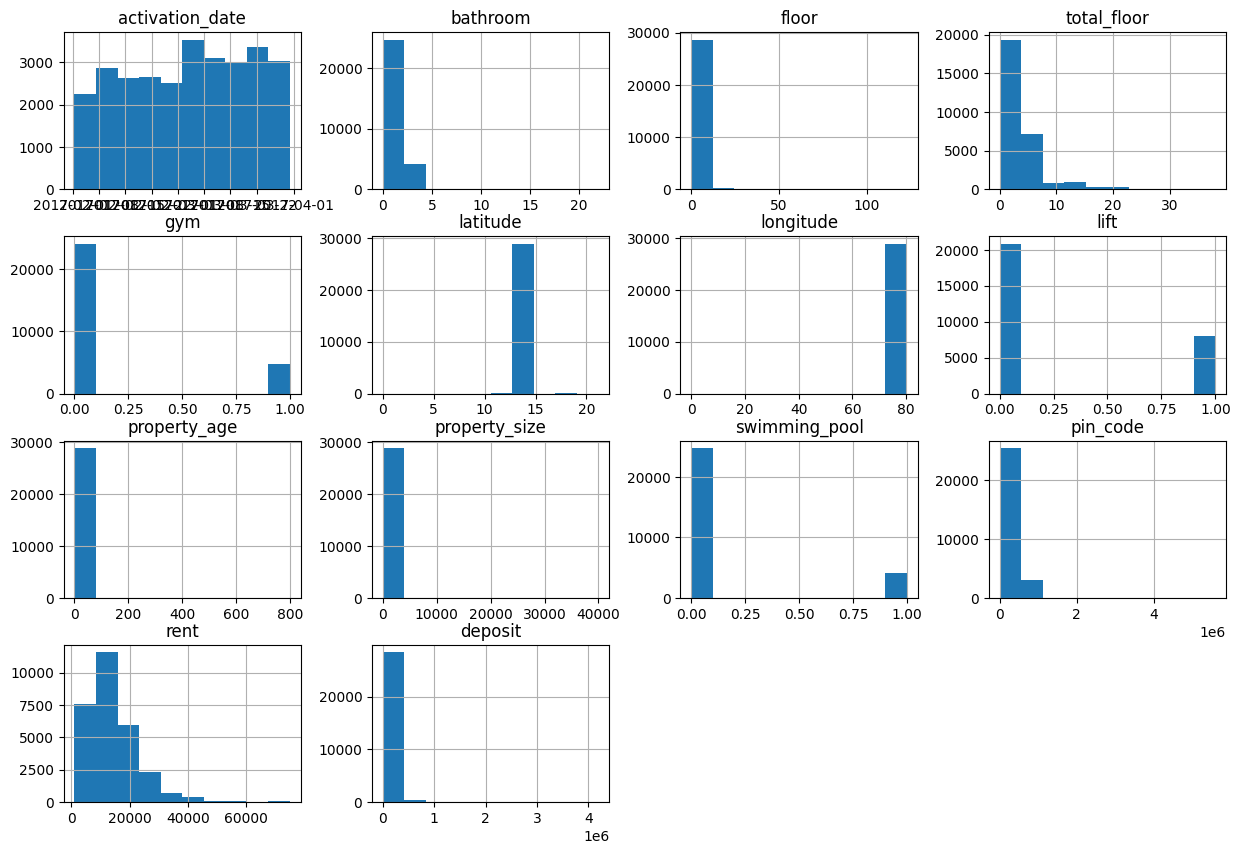

In [61]:
print("\nDistribution of numerical features:")
data.hist(figsize=(15,10))
plt.show()

## Data Engineering:

### Handing Pic data:

In [62]:
pics.head()

,property_id,photo_urls
0,ff808081469fd6e20146a5af948000ea,"[{\title\"":\""Balcony\"",\""name\"":\""IMG_20131006..."
1,ff8080814702d3d10147068359d200cd,NaN
2,ff808081470c645401470fb03f5800a6,"[{\title\"":\""Bedroom\"",\""name\"":\""ff808081470c..."
3,ff808081470c6454014715eaa5960281,"[{\title\"":\""Bedroom\"",\""name\"":\""Screenshot_7..."
4,ff808081474aa867014771a0298f0aa6,"[{\title\"":\""Other\"",\""name\"":\""ff808081474aa8..."


In [63]:
pics.shape

(28888, 2)

In [64]:
# Types of columns
pics.dtypes

property_id    object
photo_urls     object
dtype: object

In [65]:
pics.isna().sum()

property_id        0
photo_urls     11022
dtype: int64

We can see that pics data consist of two columns [ property id, photo_urls ] where photo_urls has some null values and these NULL/NaN values indicate the absence of photos on a property, i.e. photo_count = 0.

The photo_urls column has a corrupted invalid JSON array string so we need to fix it to be able to get the number of photos uploaded for each property. For this, we should correct the corrupted string and make it a valid JSON. Once we have a valid JSON format, we can get the length of this array, which would be the number of photos uploaded on the property.

In [66]:
# Try to correct the first Json
text_before = pics['photo_urls'][0]
print('Before Correction: \n\n', text_before)

# Try to replace corrupted values then convert to json 
text_after = text_before.replace('\\' , '').replace('{title','{"title').replace(']"' , ']').replace('],"', ']","')
print("\n\nAfter correction and converted to json: \n\n", json.loads(text_after))

Before Correction: 

 [{\title\":\"Balcony\",\"name\":\"IMG_20131006_120837.jpg\",\"imagesMap\":{\"original\":\"ff808081469fd6e20146a5af948000ea_65149_original.jpg\",\"thumbnail\":\"ff808081469fd6e20146a5af948000ea_65149_thumbnail.jpg\",\"medium\":\"ff808081469fd6e20146a5af948000ea_65149_medium.jpg\",\"large\":\"ff808081469fd6e20146a5af948000ea_65149_large.jpg\"},\"displayPic\":false},{\"title\":\"Bathroom\",\"name\":\"IMG_20131006_120734.jpg\",\"imagesMap\":{\"original\":\"ff808081469fd6e20146a5af948000ea_63511_original.jpg\",\"thumbnail\":\"ff808081469fd6e20146a5af948000ea_63511_thumbnail.jpg\",\"medium\":\"ff808081469fd6e20146a5af948000ea_63511_medium.jpg\",\"large\":\"ff808081469fd6e20146a5af948000ea_63511_large.jpg\"},\"displayPic\":false},{\"title\":\"Bedroom\",\"name\":\"IMG_20131006_120643.jpg\",\"imagesMap\":{\"original\":\"ff808081469fd6e20146a5af948000ea_16708_original.jpg\",\"thumbnail\":\"ff808081469fd6e20146a5af948000ea_16708_thumbnail.jpg\",\"medium\":\"ff808081469fd6e20

Getting the number of pics in json:

In [67]:
len(json.loads(text_after))

7

In the function below we replace corrupted values from photo_url, then convert it to JSON and get a count of photos:

In [68]:
# Function to correct corrupted json and get count of photos
def correction (x):
    # if value is null put count with 0 photos
    if x is np.nan or x == 'NaN':
        return 0
    else :
        # Replace corrupted values then convert to json and get count of photos
        return len(json.loads( x.replace('\\' , '').replace('{title','{"title').replace(']"' , ']').replace('],"', ']","') ))
        
# Apply Correction Function
pics['photo_count'] = pics['photo_urls'].apply(correction)

In [69]:
# Delete photo_urls column 
del pics['photo_urls']

In [70]:
# Sample of Pics data
pics.sample(5)

,property_id,photo_count
5505,ff80818156b129b50156b17f14c9124d,7
14141,ff8081815a44a9ad015a45422bdf7464,4
21567,ff8081815ab0aa10015ab17ab9f824c0,6
22541,ff8081815ab805ff015abda1ae8d290c,1
5002,ff80818155e478330155e55778570cd9,8


Now we have a dataset with two columns: property_id and photo_count with the number of photos uploaded for every property

To make more than one model and achieve the best of them, we assign more than one label here:

- The number of interactions within 3 days;
- Interactions divided into categories within 3 days;
- The number of interactions within 7 days;
- Interactions divided into categories within 7 days;

### Number of Interaction Within 3 Days:

In this step, we will get the number of interactions within 3 days by following steps: Merge the property data with interactions data and get [property_id, request_date, activation_date]; Get a Time between the Request and Activation Dates to be able to select a request within the specific number of days; Get the count of requests within the first 3 days, by taking all values if the Time between the Request and Activation Date is less than 3;

In [72]:
num_req = pd.merge(data, interaction, on ='property_id')[['property_id', 'request_date', 'activation_date']]
num_req.head()

,property_id,request_date,activation_date
0,ff808081469fd6e20146a5af948000ea,2017-03-10 17:42:34,2017-03-09 14:36:00
1,ff808081469fd6e20146a5af948000ea,2017-03-09 15:51:17,2017-03-09 14:36:00
2,ff808081469fd6e20146a5af948000ea,2017-03-10 17:30:22,2017-03-09 14:36:00
3,ff808081469fd6e20146a5af948000ea,2017-03-11 17:48:46,2017-03-09 14:36:00
4,ff8080814702d3d10147068359d200cd,2017-03-30 19:59:15,2017-03-07 12:02:00


In [75]:
# Get a Time between Request and Activation Date to be able to select request within the number of days
num_req['request_day'] = (num_req['request_date'] - num_req['activation_date']) / np.timedelta64(1, 'D')

In [76]:
num_req.head()

,property_id,request_date,activation_date,request_day
0,ff808081469fd6e20146a5af948000ea,2017-03-10 17:42:34,2017-03-09 14:36:00,1.129560
1,ff808081469fd6e20146a5af948000ea,2017-03-09 15:51:17,2017-03-09 14:36:00,0.052280
2,ff808081469fd6e20146a5af948000ea,2017-03-10 17:30:22,2017-03-09 14:36:00,1.121088
3,ff808081469fd6e20146a5af948000ea,2017-03-11 17:48:46,2017-03-09 14:36:00,2.133866
4,ff8080814702d3d10147068359d200cd,2017-03-30 19:59:15,2017-03-07 12:02:00,23.331424


In [77]:
# Get a count of requests in the first 3 days  
num_req_within_3d = num_req[num_req['request_day'] < 3].groupby('property_id').agg({ 'request_day':'count'}).reset_index()
# Show every property id with the number of requests in the first 3 days
num_req_within_3d = num_req_within_3d.rename({'request_day':'request_day_within_3d'},axis=1)
# Dataset with the number of requests within 3 days
num_req_within_3d

,property_id,request_day_within_3d
0,ff808081469fd6e20146a5af948000ea,4
1,ff8080814702d3d10147068359d200cd,3
2,ff808081470c645401470fb03f5800a6,15
3,ff808081470c6454014715eaa5960281,5
4,ff808081474aa867014771a0298f0aa6,25
...,...,...
13205,ff8081815b1fdda8015b1fdf585c004b,2
13206,ff8081815b1fdda8015b1fe675ae0146,5
13207,ff8081815b1fdda8015b1ffee8a305d2,2
13208,ff8081815b200540015b20158b0103c9,2


By the end of this step, we have the request_day_within_3d column which has the number of requests within three days.

We can convert the Interaction values to categorical values. After seeing the distribution of interactions within 3 days, we decide to convert the values into three classes:

- cat_1_to_2: one or two requests within 3 days;
- cat_3_to_5 : three to five requests within 3 days;
- cat_above_5 : above five requests within 3 days;

In [78]:
num_req_within_3d['request_day_within_3d'].value_counts()[:10]

1     5940
2     2741
3     1579
4      887
5      583
6      373
7      246
8      186
9      148
11     105
Name: request_day_within_3d, dtype: int64

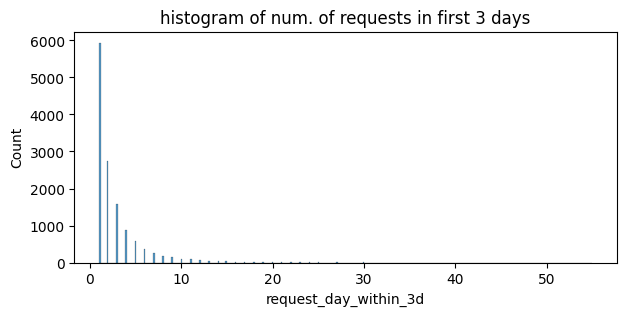

In [81]:
# Show histogram of the number of requests in the first 3 days
plt.figure(figsize=(7,3))
sns.histplot(num_req_within_3d, x="request_day_within_3d")

plt.title('histogram of num. of requests in first 3 days')
plt.show()

In [82]:
def divide(x):
    if x in [1,2]:
        return 'cat_1_to_2'
    elif x in [3,4,5]:
        return 'cat_3_to_5'
    else:
        return 'cat_above_5'

In [83]:
num_req_within_3d['categories_3day'] = num_req_within_3d['request_day_within_3d'].apply(divide)
num_req_within_3d.head(3)

,property_id,request_day_within_3d,categories_3day
0,ff808081469fd6e20146a5af948000ea,4,cat_3_to_5
1,ff8080814702d3d10147068359d200cd,3,cat_3_to_5
2,ff808081470c645401470fb03f5800a6,15,cat_above_5


In [84]:
num_req_within_3d['categories_3day'].value_counts()

cat_1_to_2     8681
cat_3_to_5     3049
cat_above_5    1480
Name: categories_3day, dtype: int64

By the end of this step, we have the categories_3day column that has the three classes:

- cat_1_to_2 appears 8681 times;
- cat_3_to_5 appears 3049 times;
- cat_above_5 appears 1480 times;

### Number of Interaction Within 7 Days

In this step, like before, we will get the number of interactions but this time within 7 days by following steps:

- First, by taking the dataset we used before which has [property_id, request_date, activation_date] columns;
- Second, we get a count of requests within the first 7 days, by taking all values if the Time between the Request and Activation Date is less than 7;

In [85]:
# Get a count of requests in the first 7 days  
num_req_within_7d = num_req[num_req['request_day'] < 7].groupby('property_id').agg({ 'request_day':'count'}).reset_index()
# Show every property id with the number of requests in the first 7 days
num_req_within_7d = num_req_within_7d.rename({'request_day':'request_day_within_7d'},axis=1)
# Dataset with the number of requests within 7 days
num_req_within_7d

,property_id,request_day_within_7d
0,ff808081469fd6e20146a5af948000ea,4
1,ff8080814702d3d10147068359d200cd,5
2,ff808081470c645401470fb03f5800a6,22
3,ff808081470c6454014715eaa5960281,7
4,ff808081474aa867014771a0298f0aa6,52
...,...,...
17381,ff8081815b1fdda8015b1fe675ae0146,8
17382,ff8081815b1fdda8015b1ffee8a305d2,3
17383,ff8081815b1fdda8015b2000369205fd,2
17384,ff8081815b200540015b20158b0103c9,2


We can convert the Interaction values to categorical values. After seeing the distribution of interactions within 3 days, we decide to convert the values into three classes:

- cat_1_to_2: one or two requests within 7 days;
- cat_3_to_5 : three to five requests within 7 days;
- cat_above_5 : above five requests within 7 days;

In [86]:
num_req_within_7d['request_day_within_7d'].value_counts()[:10]

1     5856
2     3381
3     2118
4     1421
5     1047
6      735
7      597
8      373
9      323
10     240
Name: request_day_within_7d, dtype: int64

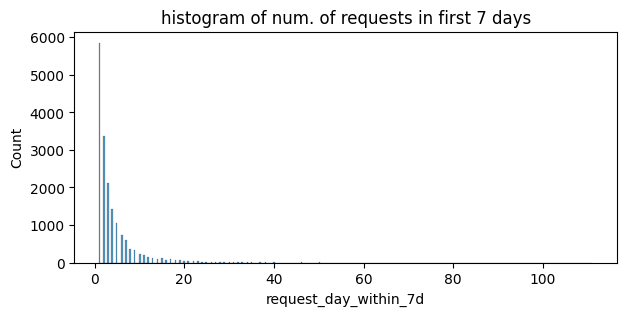

In [87]:
# Show histogram of the number of requests in the first 3 days
plt.figure(figsize=(7,3))
sns.histplot(num_req_within_7d, x="request_day_within_7d")

plt.title('histogram of num. of requests in first 7 days')
plt.show()

In [88]:
num_req_within_7d['categories_7day'] = num_req_within_7d['request_day_within_7d'].apply(divide)
num_req_within_7d.head(3)

,property_id,request_day_within_7d,categories_7day
0,ff808081469fd6e20146a5af948000ea,4,cat_3_to_5
1,ff8080814702d3d10147068359d200cd,5,cat_3_to_5
2,ff808081470c645401470fb03f5800a6,22,cat_above_5


In [89]:
num_req_within_7d['categories_7day'].value_counts()

cat_1_to_2     9237
cat_3_to_5     4586
cat_above_5    3563
Name: categories_7day, dtype: int64

### Merge Data:


All these data are merged here to create a dataset containing all the features and labels that were created.

In [90]:
data.sample()

,property_id,type,activation_date,bathroom,floor,total_floor,furnishing,gym,latitude,longitude,lease_type,lift,locality,parking,property_age,property_size,swimming_pool,pin_code,rent,deposit,building_type
23703,ff8081815accce76015ad053dd0f1801,BHK2,2017-03-15 12:18:00,2,0,2.0,SEMI_FURNISHED,0,13.018547,77.678261,ANYONE,0,Ramamurthy Nagar,TWO_WHEELER,3,800,0,560016.0,12000,100000,IF


In [91]:
pics.sample()

,property_id,photo_count
7793,ff808181592074b7015920815b870200,6


In [92]:
num_req_within_3d.sample()

,property_id,request_day_within_3d,categories_3day
13151,ff8081815b1e0e51015b1e1396480242,1,cat_1_to_2


In [93]:
print(num_req_within_3d.shape)
print(num_req_within_7d.shape)

(13210, 3)
(17386, 3)


In [95]:
num_req_within_3d.isna().sum()

property_id              0
request_day_within_3d    0
categories_3day          0
dtype: int64

In [96]:
num_req_within_7d.isna().sum()

property_id              0
request_day_within_7d    0
categories_7day          0
dtype: int64

In [94]:
label_data = pd.merge(num_req_within_7d, num_req_within_3d, on ='property_id' , how='left')

label_data.head(3)

,property_id,request_day_within_7d,categories_7day,request_day_within_3d,categories_3day
0,ff808081469fd6e20146a5af948000ea,4,cat_3_to_5,4.0,cat_3_to_5
1,ff8080814702d3d10147068359d200cd,5,cat_3_to_5,3.0,cat_3_to_5
2,ff808081470c645401470fb03f5800a6,22,cat_above_5,15.0,cat_above_5


In [97]:
label_data.isna().sum()

property_id                 0
request_day_within_7d       0
categories_7day             0
request_day_within_3d    4176
categories_3day          4176
dtype: int64

In [98]:
data_with_pics = pd.merge(data, pics, on ='property_id', how = 'left')
data_with_pics.head(3)

,property_id,type,activation_date,bathroom,floor,total_floor,furnishing,gym,latitude,longitude,lease_type,lift,locality,parking,property_age,property_size,swimming_pool,pin_code,rent,deposit,building_type,photo_count
0,ff808081469fd6e20146a5af948000ea,BHK2,2017-03-09 14:36:00,1,3,4.0,SEMI_FURNISHED,1,12.876174,77.596571,FAMILY,1,Hulimavu,BOTH,2,850,1,560076.0,12000,120000,AP,7
1,ff8080814702d3d10147068359d200cd,BHK2,2017-03-07 12:02:00,2,4,11.0,SEMI_FURNISHED,1,13.018444,77.678122,FAMILY,1,Ramamurthy Nagar,BOTH,1,1233,1,560016.0,20000,150000,AP,0
2,ff808081470c645401470fb03f5800a6,BHK2,2017-03-10 13:43:00,2,0,4.0,NOT_FURNISHED,1,12.975072,77.665865,ANYONE,1,GM Palya,FOUR_WHEELER,0,1200,0,560075.0,15000,75000,AP,12


In [99]:
dataset = pd.merge(data_with_pics, label_data, on ='property_id')
dataset.head(3)

,property_id,type,activation_date,bathroom,floor,total_floor,furnishing,gym,latitude,longitude,lease_type,lift,locality,parking,property_age,property_size,swimming_pool,pin_code,rent,deposit,building_type,photo_count,request_day_within_7d,categories_7day,request_day_within_3d,categories_3day
0,ff808081469fd6e20146a5af948000ea,BHK2,2017-03-09 14:36:00,1,3,4.0,SEMI_FURNISHED,1,12.876174,77.596571,FAMILY,1,Hulimavu,BOTH,2,850,1,560076.0,12000,120000,AP,7,4,cat_3_to_5,4.0,cat_3_to_5
1,ff8080814702d3d10147068359d200cd,BHK2,2017-03-07 12:02:00,2,4,11.0,SEMI_FURNISHED,1,13.018444,77.678122,FAMILY,1,Ramamurthy Nagar,BOTH,1,1233,1,560016.0,20000,150000,AP,0,5,cat_3_to_5,3.0,cat_3_to_5
2,ff808081470c645401470fb03f5800a6,BHK2,2017-03-10 13:43:00,2,0,4.0,NOT_FURNISHED,1,12.975072,77.665865,ANYONE,1,GM Palya,FOUR_WHEELER,0,1200,0,560075.0,15000,75000,AP,12,22,cat_above_5,15.0,cat_above_5


In [100]:
dataset.isna().sum()

property_id                 0
type                        0
activation_date             0
bathroom                    0
floor                       0
                         ... 
photo_count                 0
request_day_within_7d       0
categories_7day             0
request_day_within_3d    4176
categories_3day          4176
Length: 26, dtype: int64

## Exploratory Data Analysis and Processing:

In [101]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17386 entries, 0 to 17385
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   property_id            17386 non-null  object        
 1   type                   17386 non-null  object        
 2   activation_date        17386 non-null  datetime64[ns]
 3   bathroom               17386 non-null  int64         
 4   floor                  17386 non-null  int64         
 5   total_floor            17363 non-null  float64       
 6   furnishing             17386 non-null  object        
 7   gym                    17386 non-null  int64         
 8   latitude               17386 non-null  float64       
 9   longitude              17386 non-null  float64       
 10  lease_type             17386 non-null  object        
 11  lift                   17386 non-null  int64         
 12  locality               17386 non-null  object        
 13  p

In [102]:
# Some info about all columns
print('Column : Num. of null values')
print(dict(dataset.isna().sum()))
print('\n\n')
print('Column : data type')
print(dict(dataset.dtypes))

Column : Num. of null values
{'property_id': 0, 'type': 0, 'activation_date': 0, 'bathroom': 0, 'floor': 0, 'total_floor': 23, 'furnishing': 0, 'gym': 0, 'latitude': 0, 'longitude': 0, 'lease_type': 0, 'lift': 0, 'locality': 0, 'parking': 0, 'property_age': 0, 'property_size': 0, 'swimming_pool': 0, 'pin_code': 162, 'rent': 0, 'deposit': 0, 'building_type': 38, 'photo_count': 0, 'request_day_within_7d': 0, 'categories_7day': 0, 'request_day_within_3d': 4176, 'categories_3day': 4176}



Column : data type
{'property_id': dtype('O'), 'type': dtype('O'), 'activation_date': dtype('<M8[ns]'), 'bathroom': dtype('int64'), 'floor': dtype('int64'), 'total_floor': dtype('float64'), 'furnishing': dtype('O'), 'gym': dtype('int64'), 'latitude': dtype('float64'), 'longitude': dtype('float64'), 'lease_type': dtype('O'), 'lift': dtype('int64'), 'locality': dtype('O'), 'parking': dtype('O'), 'property_age': dtype('int64'), 'property_size': dtype('int64'), 'swimming_pool': dtype('int64'), 'pin_code': dt

In [103]:
dataset['locality'].value_counts()

Whitefield               517
JP Nagar                 415
Marathahalli             414
HSR Layout               380
Electronic City          341
                        ... 
Kereguddadahalli           1
Benson town                1
Block 1st Koramangala      1
Maruthi seva Nagar         1
Kammanahalli,Banswadi      1
Name: locality, Length: 1714, dtype: int64

In [104]:
# Dropped those columns that won't have an effect on the number of requests
dataset = dataset.drop(['property_id', 'activation_date' ,'latitude', 'longitude', 'pin_code','locality'  ] , axis=1)

We'll observe the histogram of target columns: request_day_within_7d, categories_7day, request_day_within_3d, categories_3day

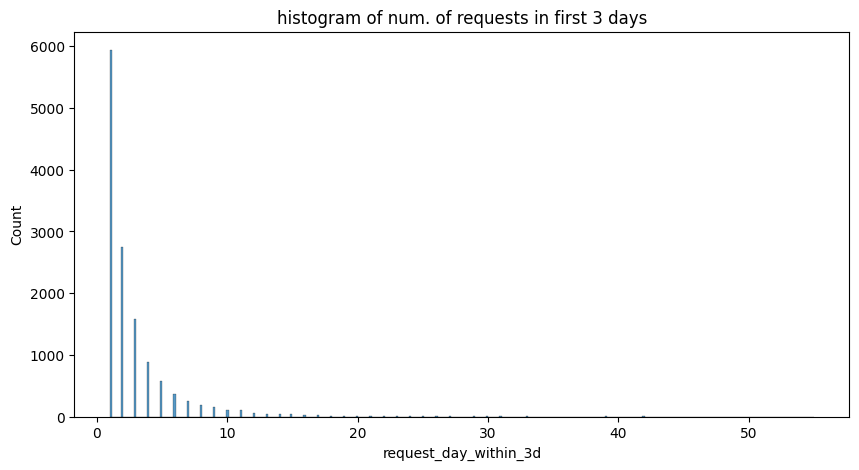

In [105]:
# Show histogram of the number of requests in first 3 days
plt.figure(figsize=(10,5))
sns.histplot(dataset, x="request_day_within_3d")

plt.title('histogram of num. of requests in first 3 days')
plt.show()

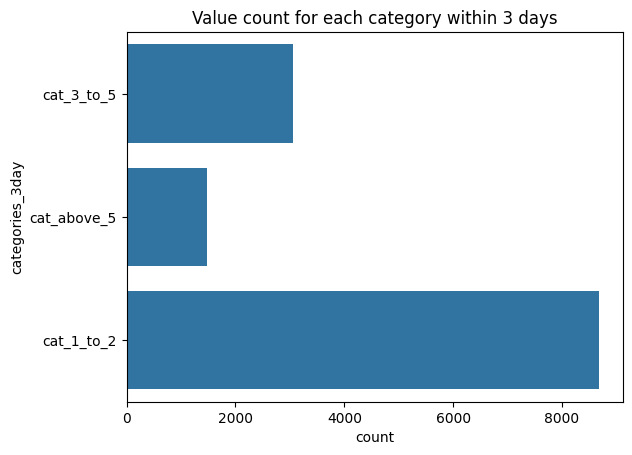

In [106]:
sns.countplot(y=dataset.categories_3day)
plt.title('Value count for each category within 3 days')
plt.show()

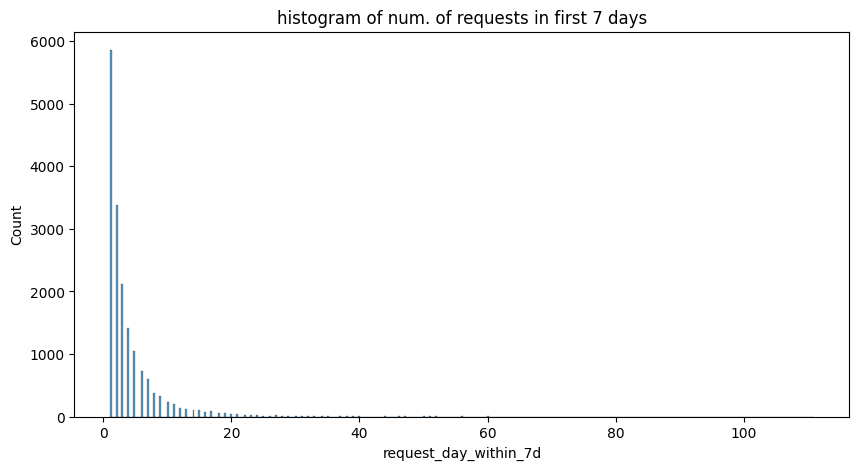

In [107]:
# Show histogram of the number of requests in first 3 days
plt.figure(figsize=(10,5))
sns.histplot(dataset, x="request_day_within_7d")

plt.title('histogram of num. of requests in first 7 days')
plt.show()

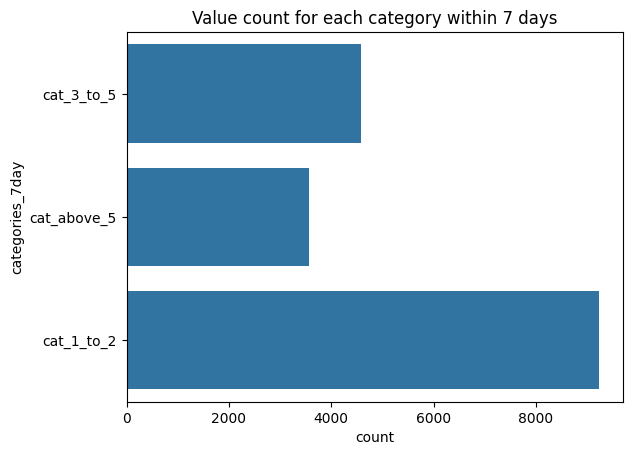

In [108]:
sns.countplot(y=dataset.categories_7day)
plt.title('Value count for each category within 7 days')
plt.show()

In the following steps, we'll divide data into categorical and numeric columns to analyze both of them separately.

In [109]:
# Get categorical columns  
df_cat = dataset.select_dtypes(include=['object'])
# Get numeric columns
df_num = dataset.select_dtypes(exclude=['object'])

In [110]:
print("Categorical Columns : \n",list(df_cat.columns) )
print("Numeric Columns : \n",list(df_num.columns) )

Categorical Columns : 
 ['type', 'furnishing', 'lease_type', 'parking', 'building_type', 'categories_7day', 'categories_3day']
Numeric Columns : 
 ['bathroom', 'floor', 'total_floor', 'gym', 'lift', 'property_age', 'property_size', 'swimming_pool', 'rent', 'deposit', 'photo_count', 'request_day_within_7d', 'request_day_within_3d']


In [111]:
df_cat.sample(2)

,type,furnishing,lease_type,parking,building_type,categories_7day,categories_3day
5255,BHK1,SEMI_FURNISHED,FAMILY,TWO_WHEELER,IF,cat_1_to_2,NaN
13271,RK1,NOT_FURNISHED,BACHELOR,TWO_WHEELER,IF,cat_3_to_5,cat_1_to_2


In [112]:
df_num.sample(2)

,bathroom,floor,total_floor,gym,lift,property_age,property_size,swimming_pool,rent,deposit,photo_count,request_day_within_7d,request_day_within_3d
2322,1,0,1.0,0,0,15,450,0,7000,80000,8,17,7.0
685,1,0,3.0,0,0,0,800,0,13000,100000,4,4,NaN


First, we'll see the value and count of it in every categorical column. Then we show it as a bar chart.

In [113]:
# Show all values and get count of them in every categorical column
for col in df_cat.columns[:-2]:
    print('Column Name : ', col)
    print(df_cat[col].value_counts())
    print('\n-------------------------------------------------------------\n')

Column Name :  type
BHK2        8510
BHK1        4508
BHK3        2691
RK1         1497
BHK4         157
BHK4PLUS      23
Name: type, dtype: int64

-------------------------------------------------------------

Column Name :  furnishing
SEMI_FURNISHED     13523
NOT_FURNISHED       2917
FULLY_FURNISHED      946
Name: furnishing, dtype: int64

-------------------------------------------------------------

Column Name :  lease_type
FAMILY      8401
ANYONE      8026
BACHELOR     928
COMPANY       31
Name: lease_type, dtype: int64

-------------------------------------------------------------

Column Name :  parking
TWO_WHEELER     8059
BOTH            7771
NONE             921
FOUR_WHEELER     635
Name: parking, dtype: int64

-------------------------------------------------------------

Column Name :  building_type
IF    10171
AP     6000
IH     1177
Name: building_type, dtype: int64

-------------------------------------------------------------



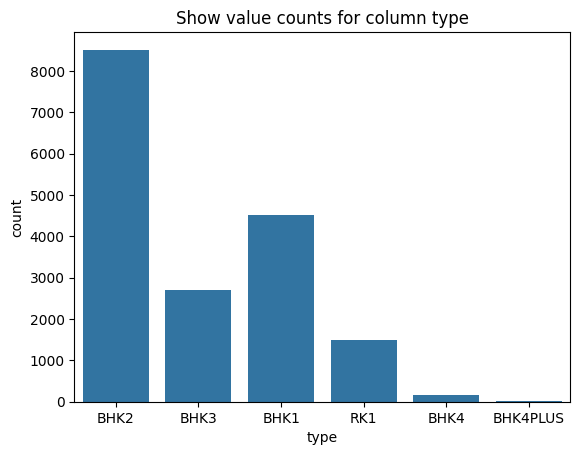

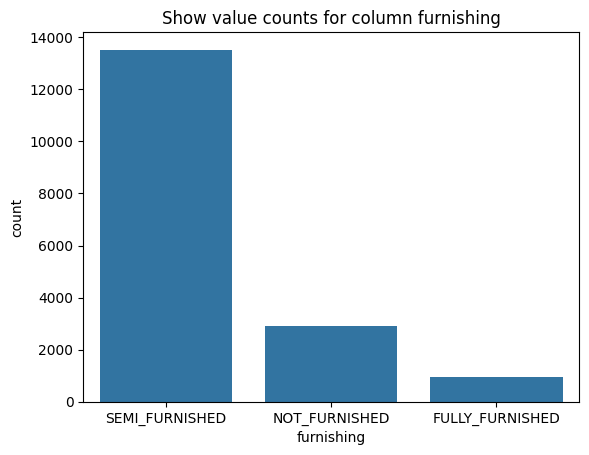

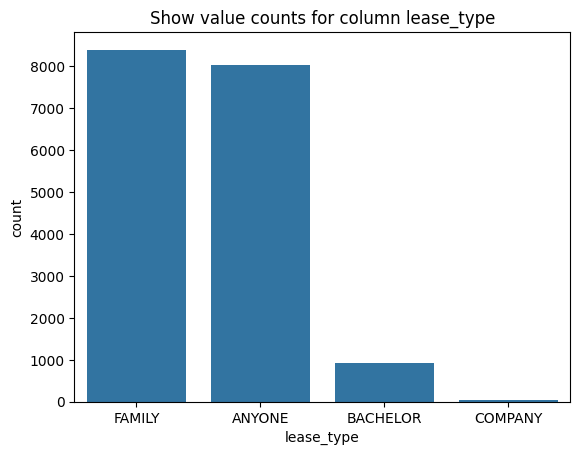

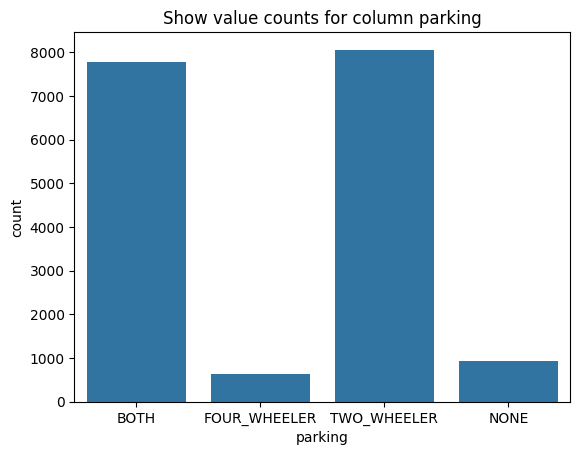

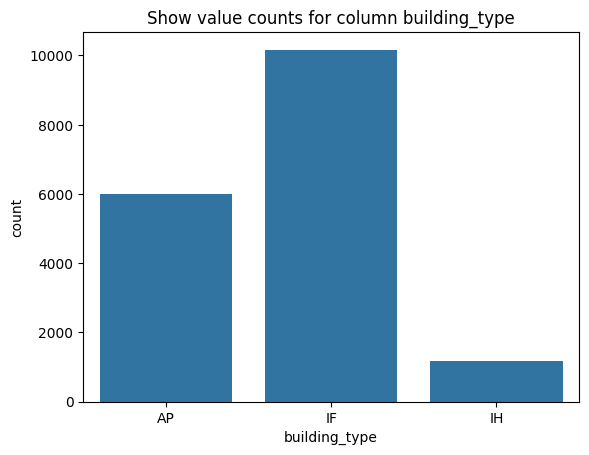

In [114]:
# Plot count of values in every columns 
for col in df_cat.columns[:-2]:
    sns.countplot(x = col,  
                  
            data = dataset
                 )
    plt.title(f'Show value counts for column {col}')
 
    # Show the plot
    plt.show()

Now we can see in columns:

- type: 'BHK4PLUS' has minimum count and 'BHK2' maximum count;
- furnishing: 'FULLY_FURNISHED' has minimum count and 'SEMI_FURNISHED' maximum count;
- lease_type: 'COMPANY' has minimum count and 'FAMILY' maximum count;
- parking: 'FOUR_WHEELER' has minimum count and 'TWO_WHEELER' maximum count;
- building_type: 'IH' has minimum count and 'IF' maximum count;

Then let's take a look at numeric data.

In [115]:
df_num.head()

,bathroom,floor,total_floor,gym,lift,property_age,property_size,swimming_pool,rent,deposit,photo_count,request_day_within_7d,request_day_within_3d
0,1,3,4.0,1,1,2,850,1,12000,120000,7,4,4.0
1,2,4,11.0,1,1,1,1233,1,20000,150000,0,5,3.0
2,2,0,4.0,1,1,0,1200,0,15000,75000,12,22,15.0
3,2,3,4.0,0,0,1,1300,0,17000,150000,9,7,5.0
4,1,1,2.0,0,0,4,450,0,6500,40000,7,52,25.0


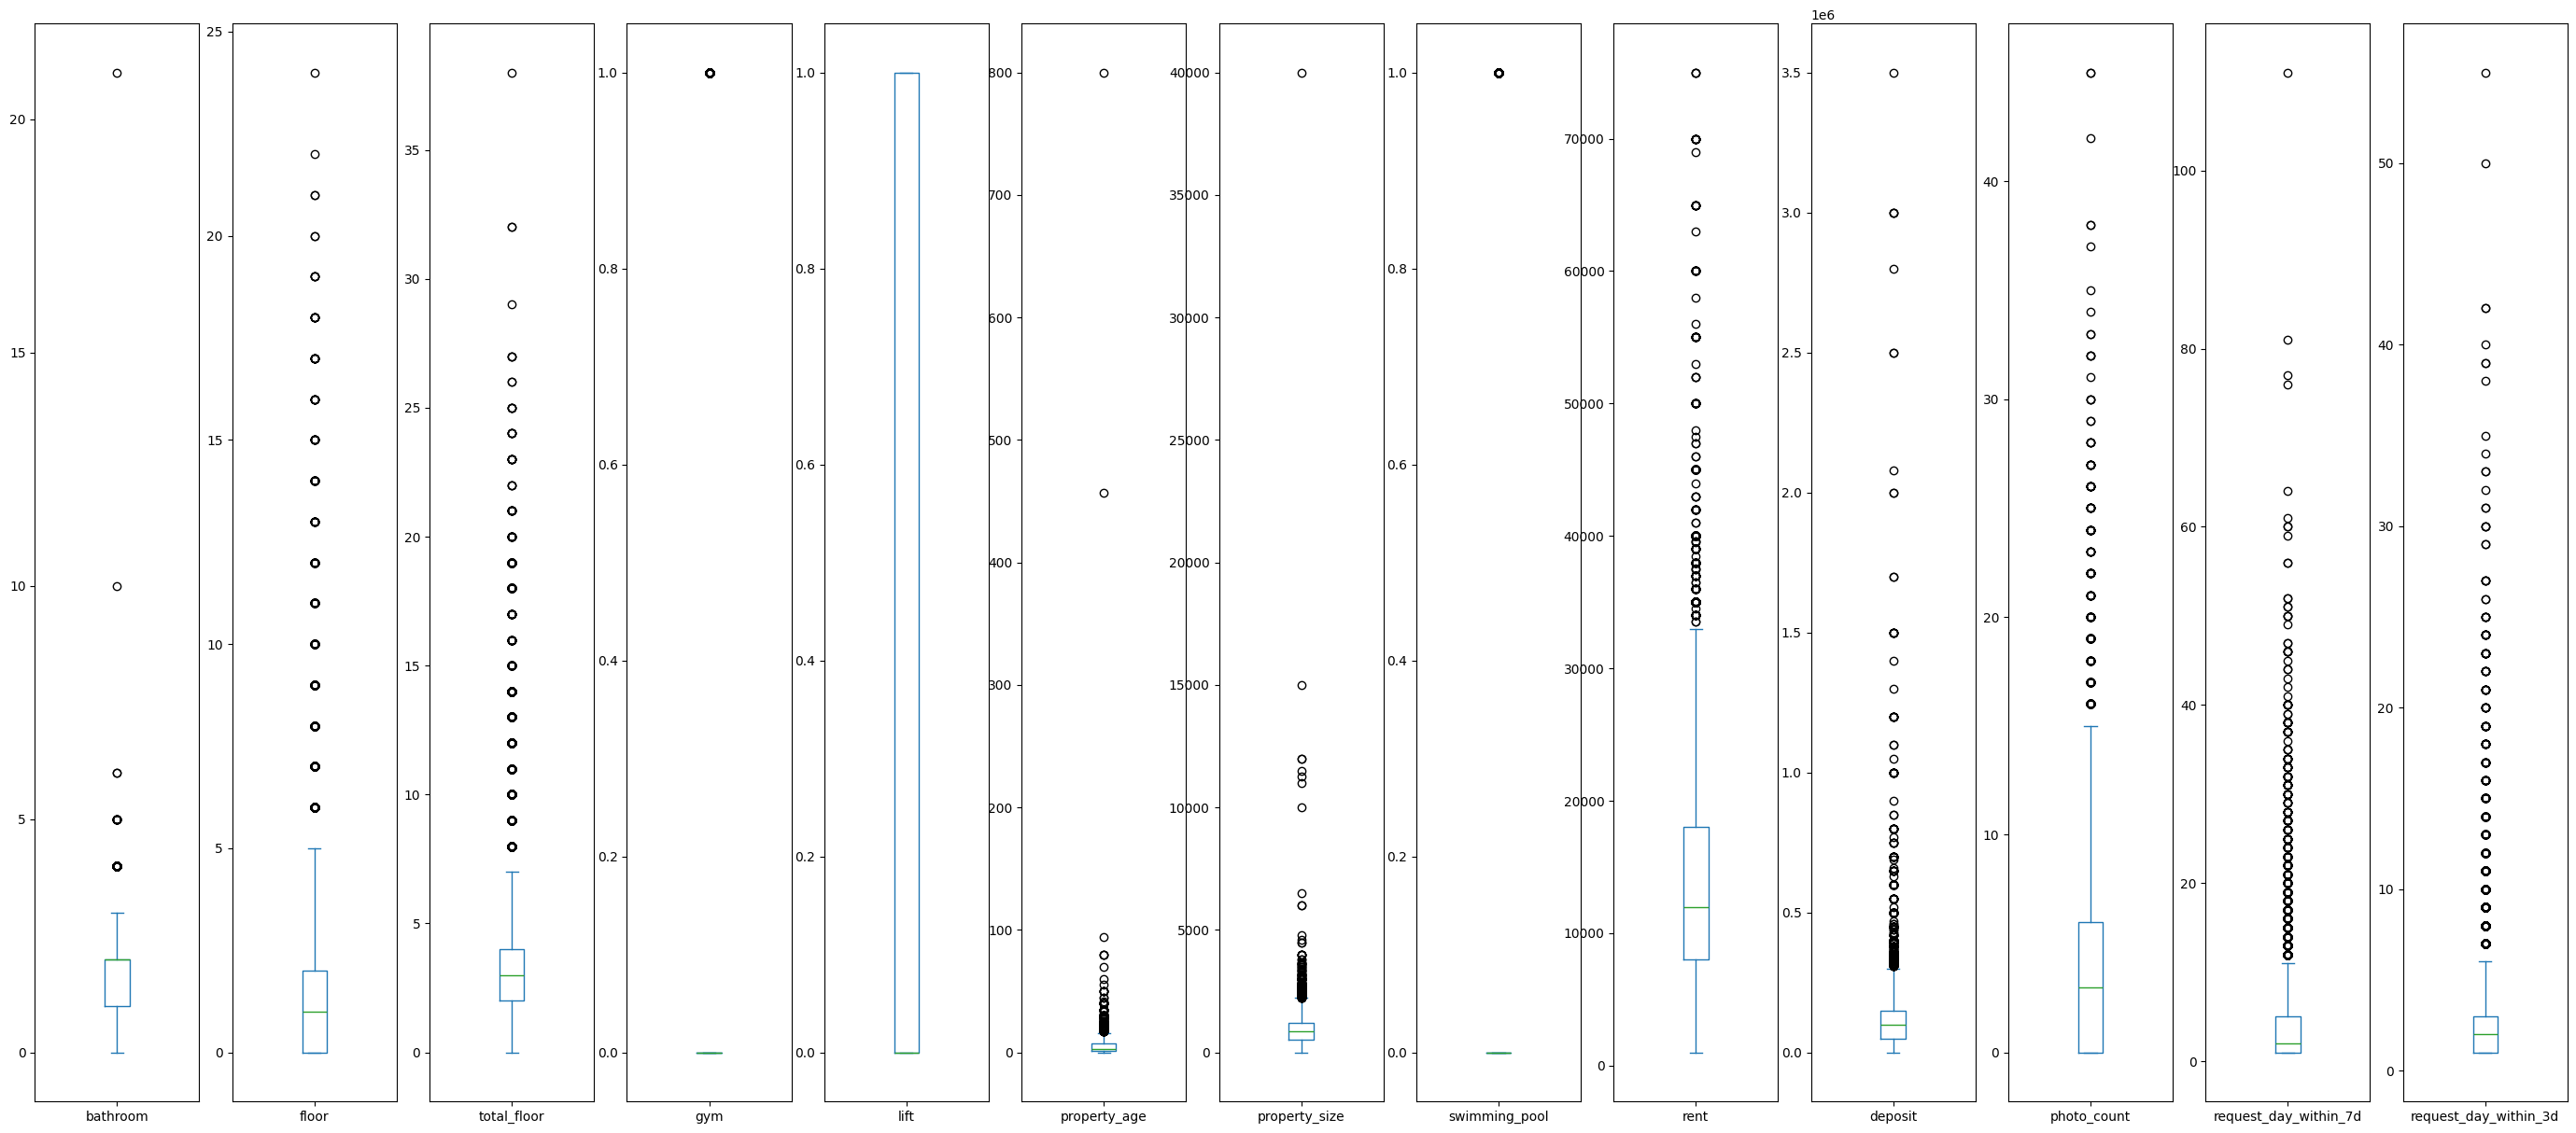

In [119]:
# Box Plot to show ranges of values and outliers
df_num.plot(kind='box', subplots=True,  sharex=False, sharey=False,figsize=(35,15))
plt.show()

In [120]:
# Get some statistics about numeric columns
df_num.describe()

,bathroom,floor,total_floor,gym,lift,property_age,property_size,swimming_pool,rent,deposit,photo_count,request_day_within_7d,request_day_within_3d
count,17386.000000,17386.000000,17363.000000,17386.000000,17386.000000,17386.000000,17386.000000,17386.000000,17386.000000,1.738600e+04,17386.000000,17386.000000,13210.000000
mean,1.702692,1.726101,3.382077,0.150063,0.265156,4.789141,912.091510,0.126769,13822.809847,1.145386e+05,3.803635,4.013632,2.802801
std,0.716630,2.041864,3.040158,0.357144,0.441429,8.781275,608.803608,0.332723,8272.442456,1.167101e+05,4.231098,5.050688,3.187711
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1000.000000,0.000000e+00,0.000000,1.000000,1.000000
25%,1.000000,0.000000,2.000000,0.000000,0.000000,1.000000,507.000000,0.000000,8000.000000,5.000000e+04,0.000000,1.000000,1.000000
50%,2.000000,1.000000,3.000000,0.000000,0.000000,3.000000,875.000000,0.000000,12000.000000,1.000000e+05,3.000000,2.000000,2.000000
75%,2.000000,2.000000,4.000000,0.000000,1.000000,7.000000,1200.000000,0.000000,18000.000000,1.500000e+05,6.000000,5.000000,3.000000
max,21.000000,24.000000,38.000000,1.000000,1.000000,800.000000,40000.000000,1.000000,75000.000000,3.500000e+06,45.000000,111.000000,55.000000


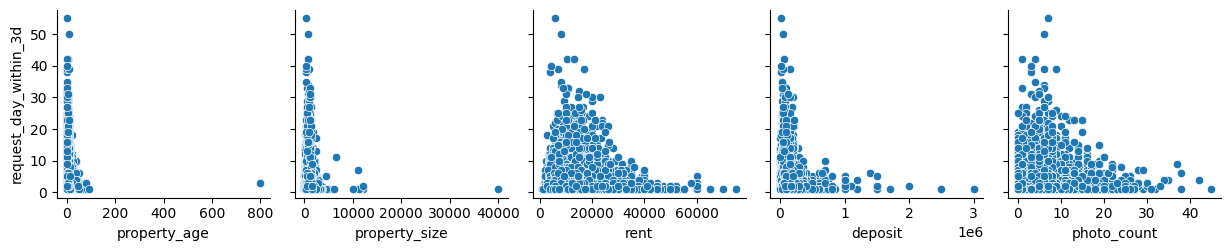

In [121]:
sns.pairplot(data=dataset,
                  x_vars=['property_age', 'property_size','rent', 'deposit', 'photo_count'],
                  y_vars=['request_day_within_3d']
             
                  )
plt.show()

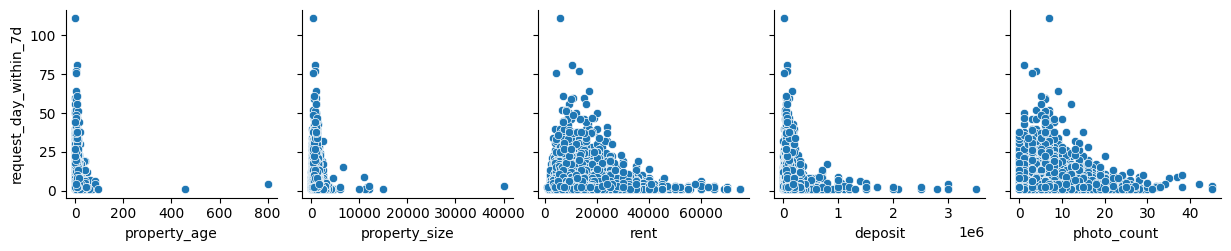

In [122]:
sns.pairplot(data=dataset,
                  x_vars=['property_age', 'property_size','rent', 'deposit', 'photo_count'],
                  y_vars=['request_day_within_7d']
             
                  )
plt.show()

After exploring the data, we can find there are many outlier values that need to be handled. We'll do it in the following steps.

## Feature Engineering:

In this section, we will apply some changes in the data to make it ready for the Modeling part, such as:

- Removing outliers using the IQR method;
- Encoding categorical data;
- Using the MinMaxScaler to scale numeric data;


### Removing Outliers:

Remove Outliers from numeric data using the Interquartile Range (IQR) method.

The Interquartile Range (IQR) method uses the 25th and 75th percentiles (quartiles) to identify outliers in a dataset. Outliers are defined as observations that fall below the 25th percentile minus 1.5 times the IQR or above the 75th percentile plus 1.5 times the IQR. This method is useful as it considers the variability within the data, rather than using fixed threshold values.

In [123]:
# Function to remove outliers using quantiles 
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3 - q1 #Interquartile range
    fence_low  = q1 - 2 * iqr
    fence_high = q3 + 2 * iqr
    df_out = df_in.loc[(df_in[col_name] <= fence_high) & (df_in[col_name] >= fence_low)]
    return df_out

In [124]:
df_num.columns

Index(['bathroom', 'floor', 'total_floor', 'gym', 'lift', 'property_age',
       'property_size', 'swimming_pool', 'rent', 'deposit', 'photo_count',
       'request_day_within_7d', 'request_day_within_3d'],
      dtype='object')

We apply the outlier function on all numeric columns except the target columns request_day_within_3d, request_day_within_7d and binary columns like gym, lift, swimming_pool

In [125]:
df = dataset.copy()
for col in df_num.columns:
    if col in ['gym', 'lift', 'swimming_pool',  'request_day_within_3d', 'request_day_within_7d']:
        continue
        
    df = remove_outlier(df , col)

In [126]:
def capping_for_3days(x):
    num = 10
    if x > num:
        return num
    else :
        return x
def capping_for_7days(x):
    num = 20
    if x > num:
        return num
    else :
        return x

In [127]:
df['request_day_within_3d_capping'] = df['request_day_within_3d'].apply(capping_for_3days)
df['request_day_within_7d_capping'] = df['request_day_within_7d'].apply(capping_for_7days)

In [128]:
df['request_day_within_3d_capping'].value_counts()

1.0     5115
2.0     2403
3.0     1404
4.0      795
5.0      532
10.0     495
6.0      339
7.0      228
8.0      168
9.0      140
Name: request_day_within_3d_capping, dtype: int64

In [129]:
df['request_day_within_7d_capping'].value_counts()[:10]

1     4934
2     2923
3     1848
4     1264
5      937
6      663
7      549
8      330
20     319
9      292
Name: request_day_within_7d_capping, dtype: int64

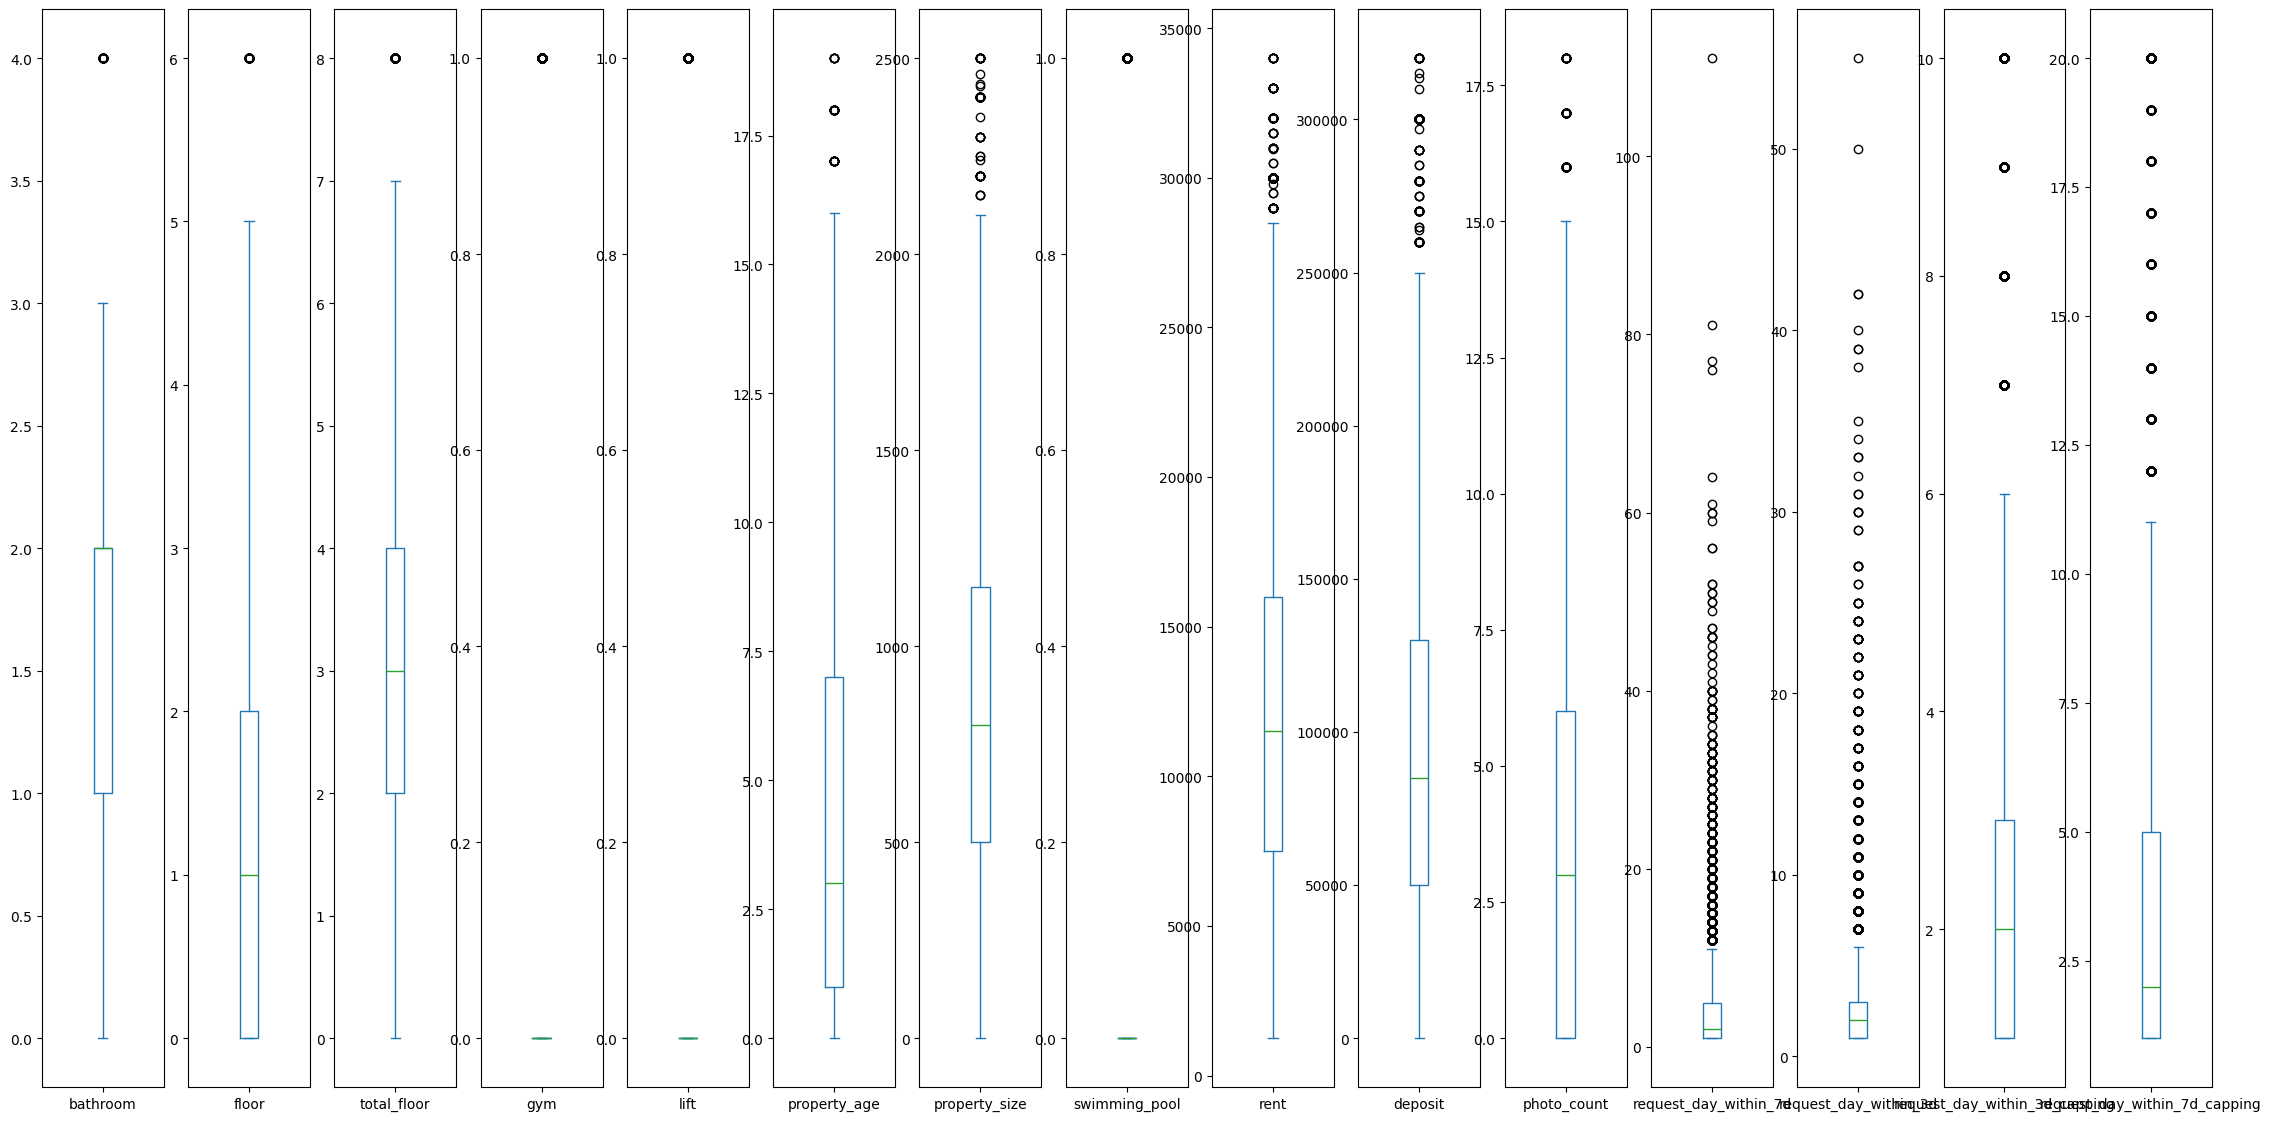

In [132]:
# Box Plot after removing some values
df.plot(kind='box', subplots=True,  sharex=False, sharey=False,figsize=(28,14))
plt.show()

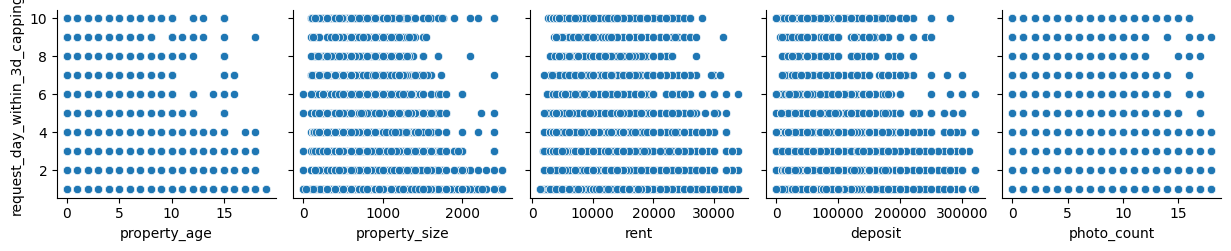

In [133]:
sns.pairplot(data=df,
                  x_vars=['property_age', 'property_size','rent', 'deposit', 'photo_count'],
                  y_vars=['request_day_within_3d_capping']
                  )
plt.show()

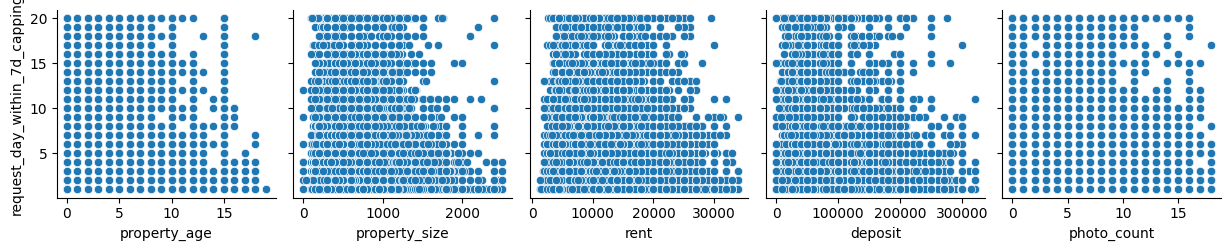

In [134]:
sns.pairplot(data=df,
                  x_vars=['property_age', 'property_size','rent', 'deposit', 'photo_count'],
                  y_vars=['request_day_within_7d_capping']
             
                  )
plt.show()

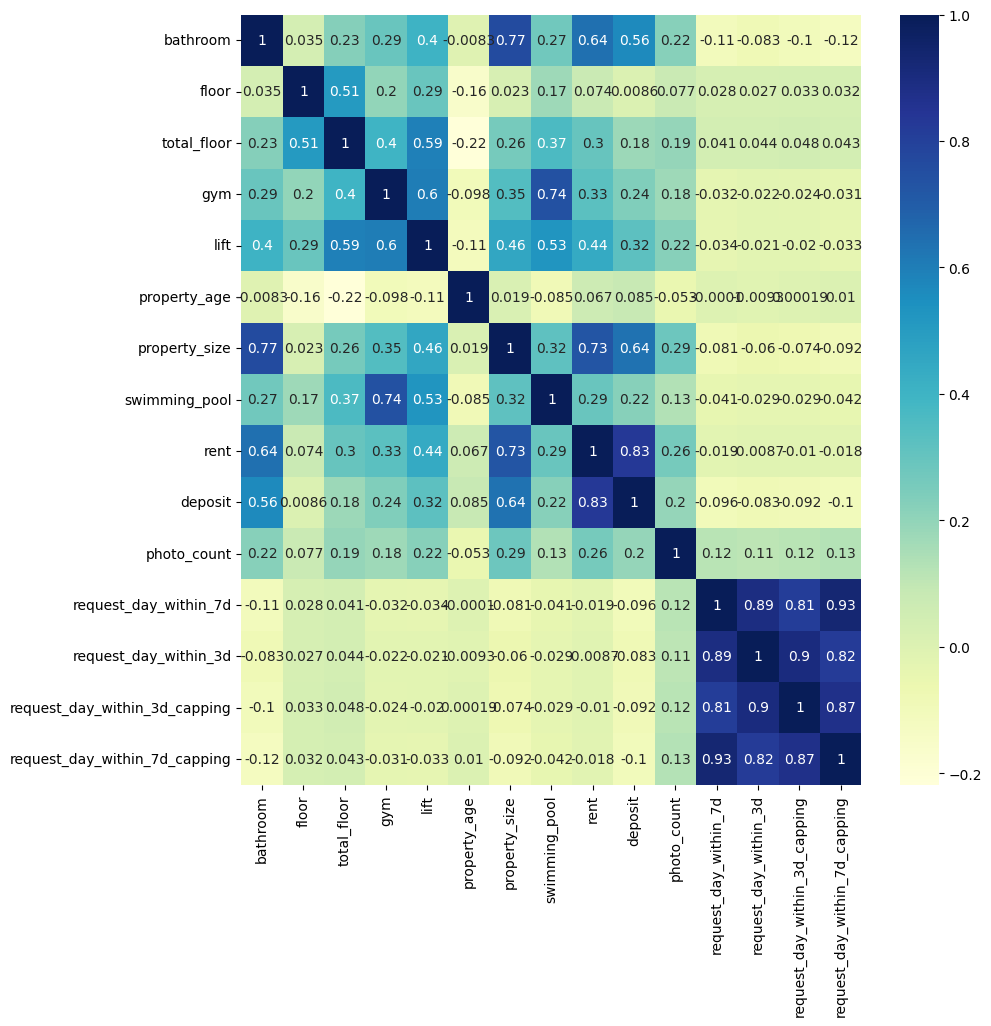

In [135]:
# Show a correlation on a heat map.
plt.subplots(figsize=(10,10))
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
# displaying heatmap
plt.show()

### One-Hot Encoding:

In [136]:
df.sample(5)

,type,bathroom,floor,total_floor,furnishing,gym,lease_type,lift,parking,property_age,property_size,swimming_pool,rent,deposit,building_type,photo_count,request_day_within_7d,categories_7day,request_day_within_3d,categories_3day,request_day_within_3d_capping,request_day_within_7d_capping
11164,BHK2,2,1,5.0,FULLY_FURNISHED,0,ANYONE,1,BOTH,0,1000,0,15000,70000,AP,11,2,cat_1_to_2,1.0,cat_1_to_2,1.0,2
8139,BHK2,2,0,2.0,SEMI_FURNISHED,0,FAMILY,0,BOTH,5,1200,0,18000,180000,IF,6,2,cat_1_to_2,1.0,cat_1_to_2,1.0,2
14657,BHK2,2,1,2.0,SEMI_FURNISHED,0,FAMILY,0,BOTH,4,1200,0,15000,200000,IF,7,7,cat_above_5,3.0,cat_3_to_5,3.0,7
13213,BHK2,2,2,3.0,SEMI_FURNISHED,0,FAMILY,0,BOTH,10,750,0,10500,75000,AP,7,1,cat_1_to_2,NaN,NaN,NaN,1
6698,BHK3,3,2,3.0,NOT_FURNISHED,0,ANYONE,1,BOTH,3,1350,0,14000,1,AP,0,1,cat_1_to_2,1.0,cat_1_to_2,1.0,1


In [137]:
df.columns

Index(['type', 'bathroom', 'floor', 'total_floor', 'furnishing', 'gym',
       'lease_type', 'lift', 'parking', 'property_age', 'property_size',
       'swimming_pool', 'rent', 'deposit', 'building_type', 'photo_count',
       'request_day_within_7d', 'categories_7day', 'request_day_within_3d',
       'categories_3day', 'request_day_within_3d_capping',
       'request_day_within_7d_capping'],
      dtype='object')

In [138]:
# One-Hot Encoder for categorical values
# dividing a data to categorical, numeric and label 
X = df.drop(['request_day_within_7d', 'categories_7day', 'request_day_within_3d',
             'categories_3day', 'request_day_within_3d_capping',
             'request_day_within_7d_capping'] , axis=1)
x_cat_withNull= df[X.select_dtypes(include=['O']).columns]
x_remain_withNull = df[X.select_dtypes(exclude=['O']).columns]
y = df[['request_day_within_7d', 'categories_7day', 'request_day_within_3d',
             'categories_3day', 'request_day_within_3d_capping',
             'request_day_within_7d_capping']]

In [139]:
x_remain = pd.DataFrame()
x_cat = pd.DataFrame()

In [140]:
# Handling Null values
# if we having null values in a numeric columns fill it with mean (Avg) 
for col in x_remain_withNull.columns:
    x_remain[col] = x_remain_withNull[col].fillna((x_remain_withNull[col].mean()))
# if we having null values in a categorical columns fill it with mode
for col in x_cat_withNull.columns:
    x_cat[col] = x_cat_withNull[col].fillna(x_cat_withNull[col].mode()[0])

In [141]:
x_remain.isna().sum()

bathroom         0
floor            0
total_floor      0
gym              0
lift             0
                ..
property_size    0
swimming_pool    0
rent             0
deposit          0
photo_count      0
Length: 11, dtype: int64

In [142]:
x_remain

,bathroom,floor,total_floor,gym,lift,property_age,property_size,swimming_pool,rent,deposit,photo_count
0,1,3,4.0,1,1,2,850,1,12000,120000,7
2,2,0,4.0,1,1,0,1200,0,15000,75000,12
3,2,3,4.0,0,0,1,1300,0,17000,150000,9
4,1,1,2.0,0,0,4,450,0,6500,40000,7
5,2,2,2.0,1,0,8,1200,1,17500,200000,3
...,...,...,...,...,...,...,...,...,...,...,...
17379,2,3,3.0,0,1,5,800,0,12500,60000,1
17381,1,0,2.0,0,0,15,1200,0,23000,200000,0
17382,2,3,3.0,0,1,8,1310,0,22000,125000,7
17384,1,1,2.0,0,0,5,600,0,14000,80000,0


In [143]:
x_cat

,type,furnishing,lease_type,parking,building_type
0,BHK2,SEMI_FURNISHED,FAMILY,BOTH,AP
2,BHK2,NOT_FURNISHED,ANYONE,FOUR_WHEELER,AP
3,BHK3,SEMI_FURNISHED,ANYONE,BOTH,AP
4,BHK1,SEMI_FURNISHED,ANYONE,BOTH,IF
5,BHK3,SEMI_FURNISHED,ANYONE,TWO_WHEELER,IF
...,...,...,...,...,...
17379,BHK2,SEMI_FURNISHED,FAMILY,BOTH,AP
17381,BHK2,SEMI_FURNISHED,FAMILY,BOTH,IF
17382,BHK3,SEMI_FURNISHED,FAMILY,BOTH,AP
17384,BHK2,SEMI_FURNISHED,ANYONE,TWO_WHEELER,IF


In [144]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(categories='auto' , handle_unknown='ignore')
feature_train = ohe.fit_transform(x_cat).toarray()
feature_labels = ohe.categories_

new_features = []
for i,j in zip(x_cat.columns,feature_labels):
    new_features.append(f"{i}_"+j)

feature_labels = np.array(new_features, dtype=object).ravel()
f=[]
for i in range(feature_labels.shape[0]):
    f.extend(feature_labels[i])


df_features = pd.DataFrame(feature_train, columns=f)

In [145]:
df_features

,type_BHK1,type_BHK2,type_BHK3,type_BHK4,type_BHK4PLUS,type_RK1,furnishing_FULLY_FURNISHED,furnishing_NOT_FURNISHED,furnishing_SEMI_FURNISHED,lease_type_ANYONE,lease_type_BACHELOR,lease_type_COMPANY,lease_type_FAMILY,parking_BOTH,parking_FOUR_WHEELER,parking_NONE,parking_TWO_WHEELER,building_type_AP,building_type_IF,building_type_IH
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15165,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
15166,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
15167,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
15168,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [146]:
print(df_features.shape)

(15170, 20)


### MinMaxScaler:

In [147]:
# Scaling
from sklearn.preprocessing import StandardScaler,MinMaxScaler

sc = MinMaxScaler()
x_remain_scaled = sc.fit_transform(x_remain)
x_remain_scaled = pd.DataFrame(x_remain_scaled, columns=x_remain.columns)

In [151]:
x_remain_scaled

,bathroom,floor,total_floor,gym,lift,property_age,property_size,swimming_pool,rent,deposit,photo_count
0,0.25,0.500000,0.500,1.0,1.0,0.105263,0.340,1.0,0.328244,0.375000,0.388889
1,0.50,0.000000,0.500,1.0,1.0,0.000000,0.480,0.0,0.419847,0.234375,0.666667
2,0.50,0.500000,0.500,0.0,0.0,0.052632,0.520,0.0,0.480916,0.468750,0.500000
3,0.25,0.166667,0.250,0.0,0.0,0.210526,0.180,0.0,0.160305,0.125000,0.388889
4,0.50,0.333333,0.250,1.0,0.0,0.421053,0.480,1.0,0.496183,0.625000,0.166667
...,...,...,...,...,...,...,...,...,...,...,...
15165,0.50,0.500000,0.375,0.0,1.0,0.263158,0.320,0.0,0.343511,0.187500,0.055556
15166,0.25,0.000000,0.250,0.0,0.0,0.789474,0.480,0.0,0.664122,0.625000,0.000000
15167,0.50,0.500000,0.375,0.0,1.0,0.421053,0.524,0.0,0.633588,0.390625,0.388889
15168,0.25,0.166667,0.250,0.0,0.0,0.263158,0.240,0.0,0.389313,0.250000,0.000000


In [148]:
y.head(1)

,request_day_within_7d,categories_7day,request_day_within_3d,categories_3day,request_day_within_3d_capping,request_day_within_7d_capping
0,4,cat_3_to_5,4.0,cat_3_to_5,4.0,4


In [149]:
# Concatenate data after applying One-Hot Encoding
data_with_3days = pd.concat([df_features.reset_index(drop=True),x_remain_scaled.reset_index(drop=True), y[['request_day_within_3d',
                                                                                                        'request_day_within_3d_capping',
                                                                                                        'categories_3day']].reset_index(drop=True)], axis=1)

In [150]:
data_with_3days.dropna(inplace=True)
data_with_3days.shape

(11619, 34)

In [152]:
# Concatenate data after applying One-Hot Encoding
data_with_7days = pd.concat([df_features.reset_index(drop=True),x_remain_scaled.reset_index(drop=True), y[['request_day_within_7d',
                                                                                                        'request_day_within_7d_capping',
                                                                                                        'categories_7day']].reset_index(drop=True)], axis=1)

In [153]:
data_with_7days.dropna(inplace=True)

data_with_7days.shape

(15170, 34)

In [154]:
data_with_7days

,type_BHK1,type_BHK2,type_BHK3,type_BHK4,type_BHK4PLUS,type_RK1,furnishing_FULLY_FURNISHED,furnishing_NOT_FURNISHED,furnishing_SEMI_FURNISHED,lease_type_ANYONE,lease_type_BACHELOR,lease_type_COMPANY,lease_type_FAMILY,parking_BOTH,parking_FOUR_WHEELER,parking_NONE,parking_TWO_WHEELER,building_type_AP,building_type_IF,building_type_IH,bathroom,floor,total_floor,gym,lift,property_age,property_size,swimming_pool,rent,deposit,photo_count,request_day_within_7d,request_day_within_7d_capping,categories_7day
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.25,0.500000,0.500,1.0,1.0,0.105263,0.340,1.0,0.328244,0.375000,0.388889,4,4,cat_3_to_5
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.50,0.000000,0.500,1.0,1.0,0.000000,0.480,0.0,0.419847,0.234375,0.666667,22,20,cat_above_5
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.50,0.500000,0.500,0.0,0.0,0.052632,0.520,0.0,0.480916,0.468750,0.500000,7,7,cat_above_5
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.25,0.166667,0.250,0.0,0.0,0.210526,0.180,0.0,0.160305,0.125000,0.388889,52,20,cat_above_5
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.50,0.333333,0.250,1.0,0.0,0.421053,0.480,1.0,0.496183,0.625000,0.166667,1,1,cat_1_to_2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15165,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.50,0.500000,0.375,0.0,1.0,0.263158,0.320,0.0,0.343511,0.187500,0.055556,8,8,cat_above_5
15166,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.25,0.000000,0.250,0.0,0.0,0.789474,0.480,0.0,0.664122,0.625000,0.000000,8,8,cat_above_5
15167,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.50,0.500000,0.375,0.0,1.0,0.421053,0.524,0.0,0.633588,0.390625,0.388889,3,3,cat_3_to_5
15168,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.25,0.166667,0.250,0.0,0.0,0.263158,0.240,0.0,0.389313,0.250000,0.000000,2,2,cat_1_to_2


# Classical Machine Learning:

## Predicting Interactions Within 3 Days:

In [155]:
# from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso, LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [156]:
data_with_3days.sample()

,type_BHK1,type_BHK2,type_BHK3,type_BHK4,type_BHK4PLUS,type_RK1,furnishing_FULLY_FURNISHED,furnishing_NOT_FURNISHED,furnishing_SEMI_FURNISHED,lease_type_ANYONE,lease_type_BACHELOR,lease_type_COMPANY,lease_type_FAMILY,parking_BOTH,parking_FOUR_WHEELER,parking_NONE,parking_TWO_WHEELER,building_type_AP,building_type_IF,building_type_IH,bathroom,floor,total_floor,gym,lift,property_age,property_size,swimming_pool,rent,deposit,photo_count,request_day_within_3d,request_day_within_3d_capping,categories_3day
9293,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.25,0.166667,0.125,0.0,0.0,0.789474,0.22,0.0,0.19084,0.15625,0.388889,3.0,3.0,cat_3_to_5


In [157]:
X = data_with_3days.drop(['request_day_within_3d',
                          'request_day_within_3d_capping',
                          'categories_3day'], axis=1)
y = data_with_3days[['request_day_within_3d', 'request_day_within_3d_capping', 'categories_3day']]

### First Iteration:

In [159]:
# Split data to train and test sets
from sklearn.model_selection import train_test_split


seed = 42
X_train, X_test, y_train, y_test = train_test_split(X, y['request_day_within_3d'], test_size = 0.2, random_state = seed)


# Try to make a model with these algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso(random_state=seed)))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor(random_state=seed)))
models.append(('xgb', xgb.XGBRegressor(random_state=seed)))

results = []
names = []
for name, model in models:
    # model 
    regressor = model
    # fit model with train data
    regressor.fit(X_train, y_train)
    # predict after training 
    y_pred=regressor.predict(X_test)
    # calc. root mean squre error 
    rms = np.sqrt(mean_squared_error(y_test, y_pred))
    
    msg = "%s: RMS => (%f)" % (name, rms)
    print(msg)

LR: RMS => (3.304227)
LASSO: RMS => (3.409854)
KNN: RMS => (3.568629)
CART: RMS => (4.914348)
xgb: RMS => (3.463343)


Based on the results, linear regression has less RMS (root mean square) so he is the best. In the next step, we will try some improvements.

### Second Iteration with capping target column:

In [160]:
# Split data to train and test set
seed = 42
X_train, X_test, y_train, y_test = train_test_split(X, y['request_day_within_3d_capping'], test_size = 0.2, random_state = seed)

# Try to make a model with these algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso(random_state=seed)))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor(random_state=seed)))
models.append(('xgb', xgb.XGBRegressor(random_state=seed)))

results = []
names = []
for name, model in models:
    # model 
    regressor = model
    # fit model with train data
    regressor.fit(X_train, y_train)
    # predict after training 
    y_pred=regressor.predict(X_test)
    # calc. root mean squre error 
    rms = np.sqrt(mean_squared_error(y_test, y_pred))
    
    msg = "%s: RMS => (%f)" % (name, rms)
    print(msg)

LR: RMS => (2.277912)
LASSO: RMS => (2.380321)
KNN: RMS => (2.472879)
CART: RMS => (3.181372)
xgb: RMS => (2.348409)


As a result of this iteration, the result is better, and the best model is still linear regression because it has a lower RMS

### Third Iteration with Classification:

In [162]:
seed = 42
# Split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y['categories_3day'], test_size = 0.2, random_state = seed)

In [163]:
y['categories_3day'].value_counts()

cat_1_to_2     7518
cat_3_to_5     2731
cat_above_5    1370
Name: categories_3day, dtype: int64

In [164]:
# Logistic Regression
lr = LogisticRegression(solver='newton-cg')
lr.fit(X_train, y_train)
y_pred_lr_pro = lr.predict_proba(X_test)
y_pred_lr = lr.predict(X_test)

print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

  cat_1_to_2       0.65      0.99      0.79      1511
  cat_3_to_5       0.29      0.01      0.01       528
 cat_above_5       0.52      0.04      0.07       285

    accuracy                           0.65      2324
   macro avg       0.49      0.35      0.29      2324
weighted avg       0.55      0.65      0.52      2324



Based on the results, we can find that the f1-score is 65% and that result is not bad but because the data is unbalanced, the model detects cat_1_to_2 is better than the other.

In [165]:
# Random Forest
rfc = RandomForestClassifier(n_estimators=10, class_weight='balanced',random_state=42)
rfc.fit(X_train, y_train)
y_pred_rfc_pro = rfc.predict_proba(X_test)
y_pred_rfc = rfc.predict(X_test)
print(classification_report(y_test, y_pred_rfc)  )

              precision    recall  f1-score   support

  cat_1_to_2       0.66      0.89      0.76      1511
  cat_3_to_5       0.27      0.12      0.16       528
 cat_above_5       0.31      0.08      0.12       285

    accuracy                           0.61      2324
   macro avg       0.41      0.36      0.35      2324
weighted avg       0.53      0.61      0.55      2324



Based on the results, we can find that the f1-score is 62% and that result is not bad it's better than logistic regression.

## Predicting Interactions Within 7 Days:

In [166]:
data_with_7days.sample()

,type_BHK1,type_BHK2,type_BHK3,type_BHK4,type_BHK4PLUS,type_RK1,furnishing_FULLY_FURNISHED,furnishing_NOT_FURNISHED,furnishing_SEMI_FURNISHED,lease_type_ANYONE,lease_type_BACHELOR,lease_type_COMPANY,lease_type_FAMILY,parking_BOTH,parking_FOUR_WHEELER,parking_NONE,parking_TWO_WHEELER,building_type_AP,building_type_IF,building_type_IH,bathroom,floor,total_floor,gym,lift,property_age,property_size,swimming_pool,rent,deposit,photo_count,request_day_within_7d,request_day_within_7d_capping,categories_7day
10059,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.25,0.333333,0.25,0.0,0.0,0.631579,0.08,0.0,0.068702,0.109375,0.0,6,6,cat_above_5


In [167]:
X = data_with_7days.drop(['request_day_within_7d',
                          'request_day_within_7d_capping',
                          'categories_7day'], axis=1)
y = data_with_7days[['request_day_within_7d', 'request_day_within_7d_capping', 'categories_7day']]

### First Iteration:

In [169]:
# Split data to train and test set
seed = 42
X_train, X_test, y_train, y_test = train_test_split(X, y['request_day_within_7d'], test_size = 0.2, random_state = seed)


# Try to make a model with these algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso(random_state=seed)))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor(random_state=seed)))
models.append(('xgb', xgb.XGBRegressor(random_state=seed)))

results = []
names = []
for name, model in models:
    # model 
    regressor = model
    # fit model with train data
    regressor.fit(X_train, y_train)
    # predict after training 
    y_pred=regressor.predict(X_test)
    # calc. root mean squre error 
    rms = np.sqrt(mean_squared_error(y_test, y_pred))
    
    msg = "%s: RMS => (%f)" % (name, rms)
    print(msg)

LR: RMS => (5.243643)
LASSO: RMS => (5.459693)
KNN: RMS => (5.596318)
CART: RMS => (7.160084)
xgb: RMS => (5.353307)


Based on the results, linear regression has less RMS (root mean square) so it is the best. In the next step, we will try some improvements.

### Second Iteration with capping target column:

In [170]:
# Split data to train and test set
seed = 42
X_train, X_test, y_train, y_test = train_test_split(X, y['request_day_within_7d_capping'], test_size = 0.2, random_state = seed)

# Try to make a model with these algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso(random_state=seed)))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor(random_state=seed)))
models.append(('xgb', xgb.XGBRegressor(random_state=seed)))

results = []
names = []
for name, model in models:
    # model 
    regressor = model
    # fit model with train data
    regressor.fit(X_train, y_train)
    # predict after training 
    y_pred=regressor.predict(X_test)
    # calc. root mean squre error 
    rms = np.sqrt(mean_squared_error(y_test, y_pred))
    
    msg = "%s: RMS => (%f)" % (name, rms)
    print(msg)

LR: RMS => (4.044754)
LASSO: RMS => (4.249220)
KNN: RMS => (4.319828)
CART: RMS => (5.797303)
xgb: RMS => (4.130722)


As a result of this iteration, the result is better, and the best model is still linear regression because it has a lower RMS

### Third Iteration with Classification:

In [171]:
seed = 42
# Split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y['categories_7day'], test_size = 0.2, random_state = seed)

In [172]:
# Logistic Regression
lr = LogisticRegression(solver='newton-cg')
lr.fit(X_train, y_train)
y_pred_lr_pro = lr.predict_proba(X_test)
y_pred_lr = lr.predict(X_test)

print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

  cat_1_to_2       0.55      0.91      0.68      1570
  cat_3_to_5       0.23      0.01      0.03       794
 cat_above_5       0.42      0.22      0.29       670

    accuracy                           0.53      3034
   macro avg       0.40      0.38      0.33      3034
weighted avg       0.44      0.53      0.42      3034



In [173]:
# Random Forest
rfc = RandomForestClassifier(n_estimators=10, class_weight='balanced',random_state=42)
rfc.fit(X_train, y_train)
y_pred_rfc_pro = rfc.predict_proba(X_test)
y_pred_rfc = rfc.predict(X_test)
print(classification_report(y_test, y_pred_rfc)  )

              precision    recall  f1-score   support

  cat_1_to_2       0.57      0.76      0.65      1570
  cat_3_to_5       0.28      0.18      0.21       794
 cat_above_5       0.39      0.26      0.31       670

    accuracy                           0.49      3034
   macro avg       0.41      0.40      0.39      3034
weighted avg       0.45      0.49      0.46      3034



Based on the results, classification is a bad choice here.

# Deep Learning:

In [176]:
X = data_with_3days.drop(['request_day_within_3d',
                          'request_day_within_3d_capping',
                          'categories_3day'], axis=1)
y = data_with_3days[['request_day_within_3d', 'request_day_within_3d_capping', 'categories_3day']]

In [177]:
seed = 42
# Split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y['request_day_within_3d_capping'], test_size = 0.2, random_state = seed)

In [180]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU, PReLU, ELU
from keras.layers import Dropout
# Create ANN model
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mean_squared_error')
hist = model.fit(X_train, y_train, epochs=50)

Epoch 1/50


291/291 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.8215
Epoch 2/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.1221
Epoch 3/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.9738
Epoch 4/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.2686
Epoch 5/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.0152
Epoch 6/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.2630
Epoch 7/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.9001
Epoch 8/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.8003
Epoch 9/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.8103
Epoch 10/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.1648
Epoch 11/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.7889
Epoch 12/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.8007
Epoch 13/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.8984
Epoch 14/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.6825
Epoch 15/50
291/291 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.6133


The result is good but Linear Regression in better because it has a lower RMS